# Import Libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import pi
import sydney_weather_data
import matplotlib

%load_ext autoreload

%autoreload 2


In [77]:
df = sydney_weather_data.load_data()

In [78]:
min(df['WindSpeed9am'])

0.0

# Colors

In [147]:
colors = ['#a6cee3', '#1f78b4']
colors = ['#CFB87C', '#565A5C']

colors = ['#7b2cbf', '#3c096c']
colors = ['#832161', '#565A5C']

In [80]:
#[, , , , , , ,  , , , , , ],
#['W', 'WNW', 'SSW', 'S', 'E', 'ESE', 'SSE', 'NNW', 'N', 'WSW', 'SE', 'NNE', 'NW', 'NE', 'ENE', 'SW'],
#['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'SW', '']
wind_direct = ['N','NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW',  'WSW', 'W', 'WNW', 'NW', 'NNW']
wind_direct_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W',  'NW']

In [81]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month,season
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,0.0,S,...,1017.6,1017.4,8.0,8.0,20.7,20.9,0,0,2,Summer
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,0.0,W,...,1017.9,1016.4,7.0,7.0,22.4,24.8,0,0,2,Summer
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,0.0,ESE,...,1016.7,1015.6,7.0,8.0,23.5,23.0,0,0,2,Summer
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,0.0,NNE,...,1014.2,1011.8,8.0,8.0,21.4,20.9,0,0,2,Summer
30180,2008-02-05,Sydney,19.7,25.7,77.4,6.8,0.0,NaN,0.0,NNE,...,1008.3,1004.8,8.0,8.0,22.5,25.5,0,0,2,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33515,2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,...,1025.9,1025.3,2.0,2.0,10.5,17.9,0,0,6,Winter
33516,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,W,30.0,W,...,1028.5,1024.6,2.0,2.0,11.0,18.7,0,0,6,Winter
33517,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,...,1020.8,1015.0,6.0,6.0,10.2,17.3,0,0,6,Winter
33518,2017-06-24,Sydney,10.1,19.3,0.0,1.4,9.3,W,43.0,W,...,1017.3,1015.1,5.0,2.0,12.4,19.0,0,0,6,Winter


In [82]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'month', 'season'],
      dtype='object')

In [83]:
df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow']].corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.768570,0.022349,0.571373,-0.055303,0.118806,-0.295097,0.226897,0.043051,0.267072,-0.388225,-0.349307,0.257438,0.180152,0.938011,0.751548,NaN,NaN
MaxTemp,0.768570,1.000000,-0.131201,0.514117,0.329771,0.135760,-0.341724,0.162684,-0.203333,-0.161265,-0.395128,-0.432155,-0.098240,-0.106117,0.860098,0.960627,NaN,NaN
Rainfall,0.022349,-0.131201,1.000000,-0.113192,-0.305559,0.079317,0.141782,0.028250,0.331468,0.298803,-0.029711,0.009737,0.277838,0.228503,-0.051115,-0.134724,NaN,NaN
Evaporation,0.571373,0.514117,-0.113192,1.000000,0.200616,0.185841,-0.067361,0.305253,-0.414735,-0.123721,-0.355092,-0.307772,-0.039944,-0.042201,0.609351,0.481981,NaN,NaN
Sunshine,-0.055303,0.329771,-0.305559,0.200616,1.000000,0.013561,-0.050728,0.197526,-0.504839,-0.583890,-0.062476,-0.109468,-0.731618,-0.747012,0.125364,0.348228,NaN,NaN
WindGustSpeed,0.118806,0.135760,0.079317,0.185841,0.013561,1.000000,0.136380,0.297352,-0.189602,-0.107036,-0.178003,-0.155380,0.038837,0.012667,0.149272,0.100567,NaN,NaN
WindSpeed9am,-0.295097,-0.341724,0.141782,-0.067361,-0.050728,0.136380,1.000000,0.194244,-0.202232,-0.153674,0.007118,0.095071,-0.070380,-0.021823,-0.329574,-0.350362,NaN,NaN
WindSpeed3pm,0.226897,0.162684,0.028250,0.305253,0.197526,0.297352,0.194244,1.000000,-0.299405,-0.144343,-0.335101,-0.283449,-0.062287,-0.102623,0.284365,0.143360,NaN,NaN
Humidity9am,0.043051,-0.203333,0.331468,-0.414735,-0.504839,-0.189602,-0.202232,-0.299405,1.000000,0.668518,0.292086,0.280723,0.459531,0.360807,-0.160852,-0.173297,NaN,NaN
Humidity3pm,0.267072,-0.161265,0.298803,-0.123721,-0.583890,-0.107036,-0.153674,-0.144343,0.668518,1.000000,0.173265,0.200865,0.496249,0.518151,0.119092,-0.220683,NaN,NaN


In [84]:
cardinal_labels = ['N', 'E', 'S', 'W']
df_wind = df.copy()
df_wind = df_wind[['WindDir9am', 'WindDir3pm']].replace(['N', 'NNE', 'NNW'], 'N')
df_wind = df_wind[['WindDir9am', 'WindDir3pm']].replace(['S', 'SSE', 'SSW'], 'S')
df_wind = df_wind[['WindDir9am', 'WindDir3pm']].replace(['W', 'WNW', 'WSW', 'NW', 'SW'], 'W')
df_wind = df_wind[['WindDir9am', 'WindDir3pm']].replace(['E', 'ENE', 'ESE', 'NE', 'SE'], 'E')
#df_wind = df_wind.replace(['N', 'NNE', 'NNW'], 'N')
#df_wind = df_wind.replace(['N', 'NNE', 'NNW'], 'N')

df_wind_dir_morning_condenced = df_wind['WindDir9am'].value_counts().reindex(cardinal_labels)
df_wind_dir_afternoon_condenced = df_wind['WindDir3pm'].value_counts().reindex(cardinal_labels)




total = sum(df_wind_dir_morning_condenced)
df_wind_dir_morning_condenced = df_wind_dir_morning_condenced/total
df_wind_dir_afternoon_condenced = df_wind_dir_afternoon_condenced/total
df_wind_dir_morning_condenced

WindDir9am
N    0.092586
E    0.157875
S    0.136481
W    0.613058
Name: count, dtype: float64

In [85]:
df_wind_dir_morning = df['WindDir9am'].value_counts().reindex(wind_direct)
df_wind_dir_afternoon = df['WindDir3pm'].value_counts().reindex(wind_direct)

total = sum(df_wind_dir_morning)
df_wind_dir_morning = df_wind_dir_morning/total
df_wind_dir_afternoon = df_wind_dir_afternoon/total
df_wind_dir_morning

WindDir9am
N      0.030985
NNE    0.028772
NE     0.024714
ENE    0.022132
E      0.042420
ESE    0.039469
SE     0.029141
SSE    0.033936
S      0.049059
SSW    0.053486
SW     0.017706
WSW    0.030616
W      0.387311
WNW    0.150867
NW     0.026558
NNW    0.032829
Name: count, dtype: float64

In [124]:
def polar_wind_chart(data_list, filename, ax_labels):
    chart_titles = ['Morning Wind Direction', 'Afternoon Wind Direction']


    # Base numbers for the graph
    angle_change = 360/len(data_list[0])
    # Create a list of angles for the direction labels
    angles = np.arange(0,360,360/len(wind_direct_labels))

    #Start in the middle of one of the pie pieces so they appear centered
    startangle =-angle_change/2

    fig, ax = plt.subplots(1, 2, figsize=(10, 6), subplot_kw={'projection':'polar'})
    for j, data in enumerate(data_list):
        # Loop through every segment
        for i, d in enumerate(data):
            x = (angle_change * pi *2)/ 360
            left = (startangle * pi *2)/ 360 
            startangle += angle_change
            ax[j].barh(0, x, left=left, height=d, align='edge', color = colors[j], zorder=3)

        # Set the plot features
        ax[j].spines.clear()
        ax[j].grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=0)
        ax[j].grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=0)
        ax[j].set_theta_offset(.5*pi)
        ax[j].set_theta_direction(-1)
        ax[j].set_thetagrids(angles, labels=wind_direct_labels, fmt=None)
        ax[j].set_title(chart_titles[j])
        ax[j].set_yticks(ax_labels[0], labels = ax_labels[1])


    plt.subplots_adjust(left=None, bottom=0.25, right=None, top=0.81, wspace=None, hspace=None)
    fig.suptitle('Wind Direction in Sydney from February 2008 to June 2017', fontsize=14)
    fig.text(x=0.10, y=0.12, s="Source: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)
    fig.savefig(f'./images/{filename}', bbox_inches='tight')
    plt.show()

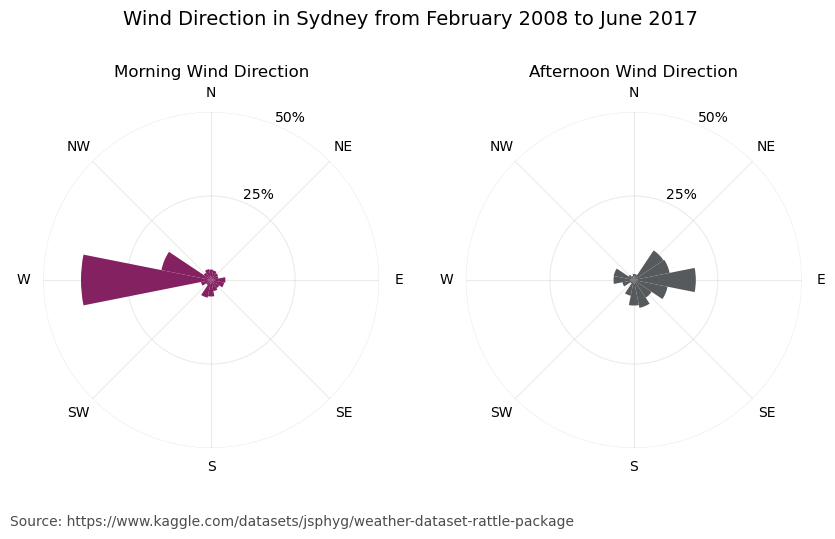

In [148]:
polar_wind_chart([df_wind_dir_morning, df_wind_dir_afternoon], 'sydney_wind_direct.svg', [[.25,.5], ['25%','50%']])

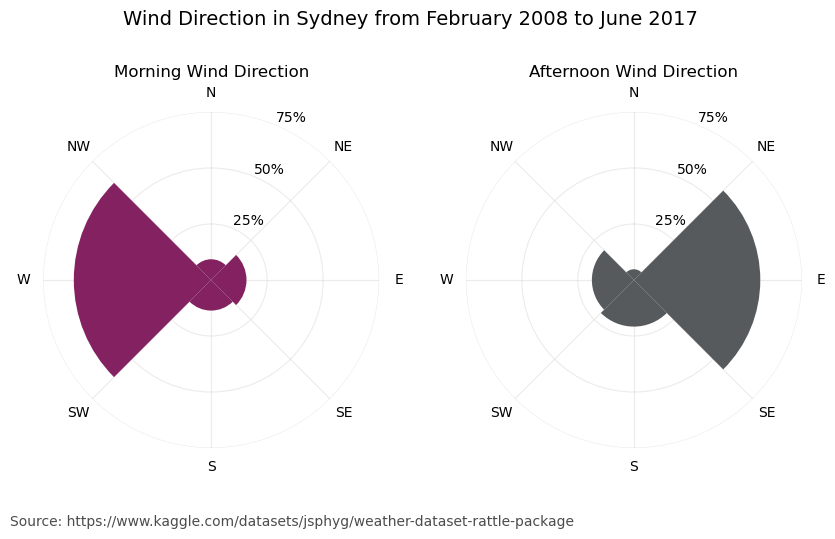

In [149]:
polar_wind_chart([df_wind_dir_morning_condenced, df_wind_dir_afternoon_condenced], 'sydney_wind_direction_condensed.svg', [[.25,.5, .75], ['25%','50%','75%']] )

In [119]:
#df.groupby([]).
#df.groupby(['WindSpeed9am', 'WindSpeed3pm', 'month'])['WindSpeed9am'].mean().unstack('month').reset_index()
windspeed_group_season = df.groupby(['season'], as_index=False, observed=True)[['WindSpeed9am', 'WindSpeed3pm']].median().sort_values('season')
windspeed_group_season

,season,WindSpeed9am,WindSpeed3pm
0,Spring,13.0,20.0
1,Summer,11.0,20.0
2,Fall,15.0,19.0
3,Winter,17.0,17.0


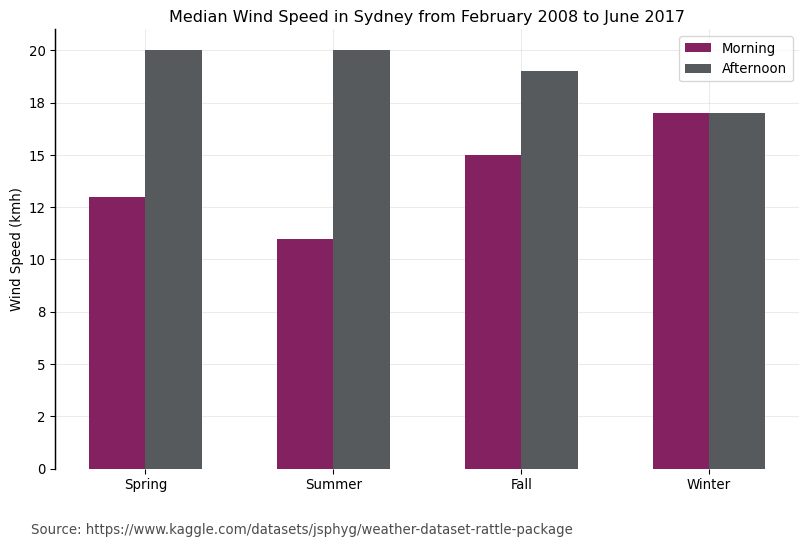

In [150]:
data = windspeed_group_season
x = np.array([1,2,3,4])
bar_width = .3
fig, ax = plt.subplots(figsize=(10,7.5), dpi = 96)
ax.bar(x-bar_width/2, windspeed_group_season['WindSpeed9am'], width=bar_width, align='center', label = 'Morning', color = colors[0], zorder=3)
ax.bar(x+bar_width/2, windspeed_group_season['WindSpeed3pm'], width=bar_width,  align='center', label = 'Afternoon', color = colors[1], zorder=3)
ax.set_xticks(x, labels = windspeed_group_season['season'])
ax.set_title('Median Wind Speed in Sydney from February 2008 to June 2017')
ax.set_ylabel('Wind Speed (kmh)')
ax.text(x=0.10, y=0.15, s="Source: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=0)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=0)
    # Make the left spine thicker
ax.spines[['top','right','bottom']].set_visible(False)
ax.spines['left'].set_linewidth(1.1)
plt.subplots_adjust(left=None, bottom=0.24, right=None, top=0.85, wspace=None, hspace=None)
plt.legend()
fig.savefig(f'./images/sydney_median_windspeed.svg', bbox_inches='tight')
plt.show()


In [91]:
min(df)

'Cloud3pm'

In [92]:
df[pd.isna(df[['WindSpeed9am','WindSpeed3pm']])]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month,season
30176,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30177,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30178,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30179,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30180,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33515,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33516,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33517,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33518,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


465 465


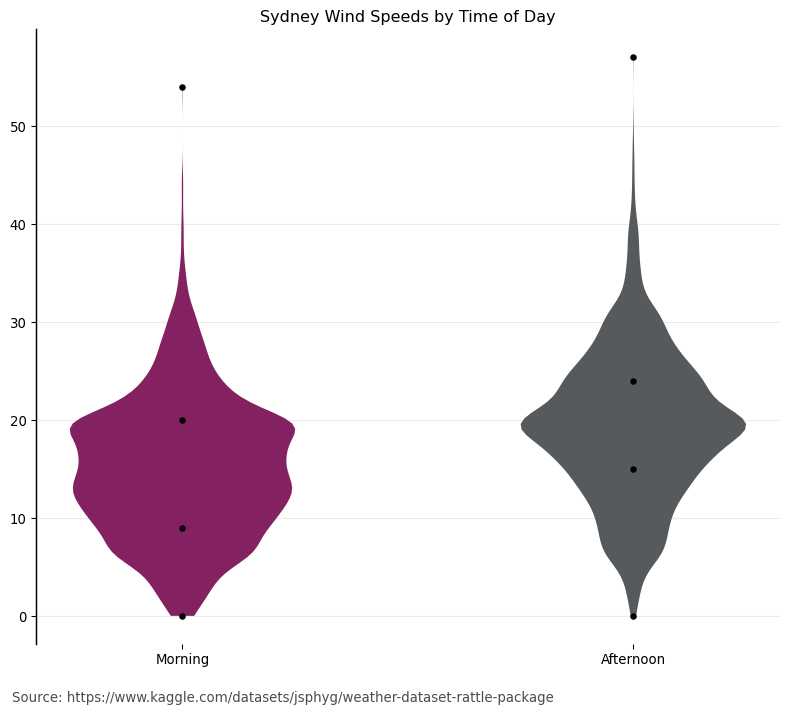

In [151]:
data = df[['WindSpeed9am','WindSpeed3pm']]
min_data, quartile1, medians, quartile3, max_data = np.percentile(data, [0, 25, 50, 75, 100], axis=0)
data_max_9am = data[data['WindSpeed9am'] > quartile3[0]]['WindSpeed9am']
data_max_3pm = data[data['WindSpeed3pm'] > quartile3[1]]['WindSpeed3pm']
max_x_9am = np.full(len(data_max_9am), 1)
max_x_3pm = np.full(1, len(data_max_3pm))
print(len(max_x_9am), len(data_max_9am),)
inds = np.arange(1, len(medians) + 1)

fig, ax = plt.subplots(figsize=(10,10), dpi = 96)
vplot = ax.violinplot(data, showmeans=True, showmedians=True,
        showextrema=False)
for i, pc in enumerate(vplot['bodies']):
    if i == 0:
        pc.set_facecolor(colors[0])
        pc.set_alpha(1)
        pc.set_zorder(3)
        """ ax.scatter(i+1, min_data[i], marker='o', color=colors[1], s=15, zorder=3)
        ax.scatter(i+1, max_data[i], marker='o', color=colors[1], s=15, zorder=3)
        ax.scatter(i+1, quartile1[i], marker='o', color=colors[1], s=15, zorder=3)
        ax.scatter(i+1, quartile3[i], marker='o', color=colors[1], s=15, zorder=3)"""

    else:
        pc.set_facecolor(colors[1])
        pc.set_alpha(1)
        pc.set_zorder(3)
        """ax.scatter(i+1, min_data[i], marker='o', color=colors[0], s=15, zorder=3)
        ax.scatter(i+1, max_data[i], marker='o', color=colors[0], s=15, zorder=3)
        ax.scatter(i+1, quartile1[i], marker='o', color=colors[0], s=15, zorder=3)
        ax.scatter(i+1, quartile3[i], marker='o', color=colors[0], s=15, zorder=3)"""
#vplot['bodies'].set_facecolor('#D43F3A')
ax.spines['left'].set_linewidth(1.1)
ax.spines[['top','right','bottom']].set_visible(False)
ax.set_xticks(inds, labels = ['Morning','Afternoon'])
#ax.scatter(inds, medians, marker='o', color=colors[1], s=30, zorder=3)
ax.scatter(inds, min_data, marker='o', color='black', s=15, zorder=3)
ax.scatter(inds, max_data, marker='o', color='black', s=15, zorder=3)
ax.scatter(inds, quartile1, marker='o', color='black', s=15, zorder=3)
ax.scatter(inds, quartile3, marker='o', color='black', s=15, zorder=3)

plt.subplots_adjust(left=None, bottom=0.21, right=None, top=0.85, wspace=None, hspace=None)
ax.text(x=0.10, y=0.15, s="Source: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)
ax.set_title('Sydney Wind Speeds by Time of Day')
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=0)
fig.savefig(f'./images/sydney_windspeeds_violin.svg', bbox_inches='tight')
plt.show()

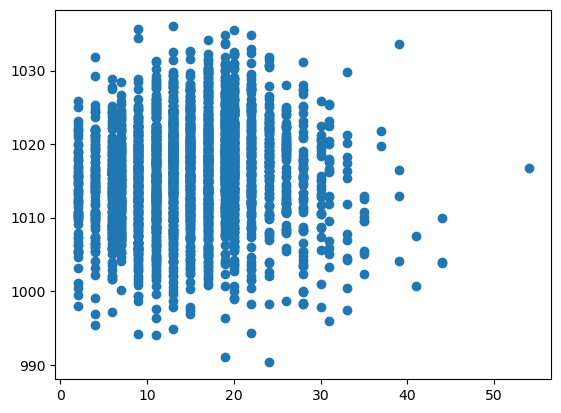

In [51]:
fig, ax = plt.subplots()
ax.scatter(df['WindSpeed9am'], df['Pressure3pm'])

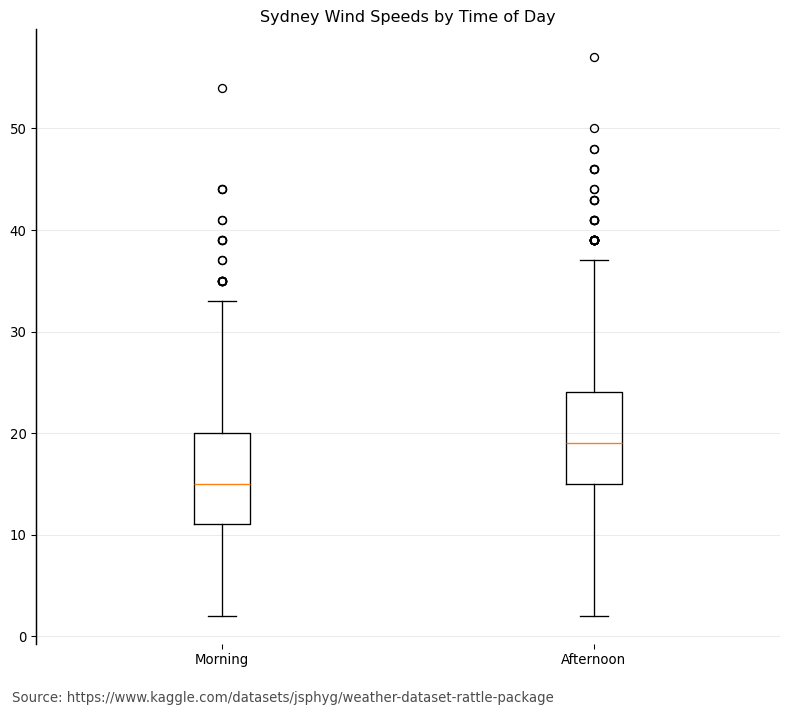

In [190]:
data = df[['WindSpeed9am','WindSpeed3pm']]
min_data, quartile1, medians, quartile3, max_data = np.percentile(data, [0, 25, 50, 75, 100], axis=0)
fig, ax = plt.subplots(figsize=(10,10), dpi = 96)
ax.boxplot(data, labels = ['Morning', 'Afternoon'])
ax.set_title('Sydney Wind Speeds by Time of Day')

plt.subplots_adjust(left=None, bottom=0.21, right=None, top=0.85, wspace=None, hspace=None)
ax.text(x=0.10, y=0.15, s="Source: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

ax.spines['left'].set_linewidth(1.1)
ax.spines[['top','right','bottom']].set_visible(False)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=0)
plt.show()